In [1]:
from urllib.request import urlopen

In [13]:
req = urlopen('http://python.org')

In [14]:
req

In [15]:
# req 의 html 을 가져오는데 
# html 은 byte 타입으로 되있기 때문에 utf-8 로 decoding 한다 
text = req.read().decode("utf-8")

In [16]:
type(text)

str

In [17]:
text

'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Han

In [18]:
res = urlopen("http://www.google.com")

In [19]:
res.read()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="lSlJ04AUFEGgMDsMGaGI/w==">(function(){window.google={kEI:\'sRxMW7SKI8a80gThvb3IBQ\',kEXPI:\'0,18168,1335579,57,884,1073,1018,280,495,216,387,1252,607,188,125,9,127,261,2339336,214,213,32,329294,1294,12383,2349,2506,32692,15247,867,316,1264,7,4469,2875,3232,14329,2192,367,550,664,2102,113,2201,3191,725,3,513,1195,136,130,5107,444,131,1119,2,1306,310,2121,254,1108,1712,1376,505,277,453,377,1240,479,608,478,208,8,1570,222,490,61,1232,1022,277,2,2825,279,479,878,392,89,44,626,2,153,508,1365,274,41,75,2,75,3,774,161,396,29,272,141,187,569,509,1587,214,82,1040,304,868,8,46,18,7,10,138,22,3,333,51,72,7,901,208,9,121,105,386,840,135,117,7,28,73,390,620,29,460,245,3,186,4,4,4,4,101,148,236,376,75,7,63,6,51,158,353

---

## google 의 robots.txt 에 보면 search? 는 disallow 되어있어서 403 error 를 벹는다

In [20]:
urlopen("https://www.google.co.kr/search?q=cnn&oq=cnn&aqs=chrome..69i57j0l5.500j0j7&sourceid=chrome&ie=UTF-8")

HTTPError: HTTP Error 403: Forbidden

---

In [21]:
from urllib.error import HTTPError

try:
    urlopen("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%88%EB%85%95")
except HTTPError as e:
    print(e.code, e.reason, e.headers)

403 Forbidden Date: Mon, 16 Jul 2018 04:27:24 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Vary: Accept-Encoding
Set-Cookie: page_uid=T0wPrspVuFZssa/Gvwossssss4Z-449838; path=/; domain=.naver.com
Set-Cookie: _naver_usersession_=O63LebwFREN8w61lky9uPw==; path=/; expires=Mon, 16-Jul-18 04:32:24 GMT; domain=.naver.com
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; report=/p/er/post/xss
Cache-Control: no-cache, no-store, must-revalidate, max-age=0
Pragma: no-cache
Vary: Accept-Encoding




In [30]:
from urllib.request import Request
from urllib.error import HTTPError

#url : 경로, agent : header(default:python-bot, num_retries :재시도 횟수)
def download(url, agent="python-bot", num_retries=2 ):
    headers = {"User-agent": agent}
    req = Request(url, headers=headers)
    
    try:
        res = urlopen(req)
    except HTTPError as e:
        res = None
        print(e.code, e.reason, e.headers)

        if 500<=e.error<600 and num_retries>0:
            # 반복횟수에 맞게 재귀적으로 호출 
            return download(url, num_retries=num_retries-1)
    

    return res

In [31]:
html = download("http://httpstat.us/500")

500 Internal Server Error Cache-Control: private
Server: Microsoft-IIS/10.0
X-AspNetMvc-Version: 5.1
Access-Control-Allow-Origin: *
X-AspNet-Version: 4.0.30319
X-Powered-By: ASP.NET
Set-Cookie: ARRAffinity=8d9742d8920fc8f87dbfb6e900a1f176e365d58296d2c5e44961e07bf1b65817;Path=/;HttpOnly;Domain=httpstat.us
Date: Mon, 16 Jul 2018 04:39:45 GMT
Connection: close
Content-Length: 0




AttributeError: 'HTTPResponse' object has no attribute 'error'

---

## header 에 agent 넣어주면 403 error 안뜨고 crawling 가능 

In [37]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%88%EB%85%95", agent)

In [38]:
html

In [39]:
html.read().decode("utf-8")

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="안녕 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'안녕\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'안녕\'의 네이버 통합검색 결과입니다."> <title>안녕 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https

---

## Request 
- urlopen() 할 필요가 없다 
- res.code () : 오류를 나타내는 코드
- utf-8 로 자동으로 html encoding 함

In [40]:
import requests

In [43]:
#url : 경로, agent : header(default:python-bot, num_retries :재시도 횟수)
def download(url, agent="python", num_retries=2 ):
    headers = {"User-agent": agent}
    
    res = requests.request("get", url, headers=headers)
    # res.code = res.status_code
    if 500<=res.status_code<600 and num_retries>0:
        print(res.code, resp.reason)
        return download(url, num_retries=num_retries-1)

    return res

In [44]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%88%EB%85%95", agent)

In [45]:
html

<Response [200]>

In [46]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="안녕 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'안녕\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'안녕\'의 네이버 통합검색 결과입니다."> <title>안녕 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https

In [48]:
type(html.text)

str

In [49]:
html.encoding

'UTF-8'

---

html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%88%EB%85%95"

에서 

query 부분을 
query=parse.quote("한글")

In [50]:
from urllib import parse

In [51]:
# 한글 --> hex byte 로 바꿔줌 
parse.quote("한글")

'%ED%95%9C%EA%B8%80'

### keyword 를 '고려대' 로 

In [55]:
html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query="+parse.quote("고려대"))

In [56]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="고려대 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'고려대\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'고려대\'의 네이버 통합검색 결과입니다."> <title>고려대 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="h

---

## json 형태로

In [57]:
import json

In [59]:
params = {"where":"nexearch",
         "sm":"top_hty",
         "fbm":0,
         "ie":"utf8",
         "query":parse.quote("고려대")}

In [60]:
params

{'where': 'nexearch',
 'sm': 'top_hty',
 'fbm': 0,
 'ie': 'utf8',
 'query': '%EA%B3%A0%EB%A0%A4%EB%8C%80'}

In [61]:
# json 을 str 으로 변환
jsonParams = json.dumps(params)

In [62]:
jsonParams

'{"where": "nexearch", "sm": "top_hty", "fbm": 0, "ie": "utf8", "query": "%EA%B3%A0%EB%A0%A4%EB%8C%80"}'

In [63]:
# json 타입그대로 post 방식으로 보낸다 
# test site : http://httpbin.org/post

#url : 경로, agent : header(default:python-bot, num_retries :재시도 횟수)
def downloadJson(url, agent="python", num_retries=2 ):
    headers = {"User-agent": agent}
    res = requests.request("post", url, headers=headers, json=jsonParams)
    
    # res.code = res.status_code
    if 500<=res.status_code<600 and num_retries>0:
        print(res.code, resp.reason)
        return download(url, num_retries=num_retries-1)

    return res

In [64]:
html = downloadJson("http://httpbin.org/post")

In [65]:
html.text

'{"args":{},"data":"\\"{\\\\\\"where\\\\\\": \\\\\\"nexearch\\\\\\", \\\\\\"sm\\\\\\": \\\\\\"top_hty\\\\\\", \\\\\\"fbm\\\\\\": 0, \\\\\\"ie\\\\\\": \\\\\\"utf8\\\\\\", \\\\\\"query\\\\\\": \\\\\\"%EA%B3%A0%EB%A0%A4%EB%8C%80\\\\\\"}\\"","files":{},"form":{},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Content-Length":"122","Content-Type":"application/json","Host":"httpbin.org","User-Agent":"python"},"json":"{\\"where\\": \\"nexearch\\", \\"sm\\": \\"top_hty\\", \\"fbm\\": 0, \\"ie\\": \\"utf8\\", \\"query\\": \\"%EA%B3%A0%EB%A0%A4%EB%8C%80\\"}","origin":"163.152.3.132","url":"http://httpbin.org/post"}\n'

---

In [66]:
def downloadGet(url, agent="python", num_retries=2 ):
    headers = {"User-agent": agent}
    res = requests.get(url, headers=headers)

    # res.code = res.status_code
    if 500<=res.status_code<600 and num_retries>0:
        print(res.code, resp.reason)
        return download(url, num_retries=num_retries-1)

    return res

In [67]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

html = downloadGet("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%88%EB%85%95", agent)

In [68]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="안녕 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'안녕\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'안녕\'의 네이버 통합검색 결과입니다."> <title>안녕 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https

## get 방식에 params 붙는 형태로

In [87]:
# request.get 방식 params 는 dict 형태나 byte 형태
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = downloadGet("https://search.naver.com/search.naver", agent)

In [88]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content=" : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'\'의 네이버 통합검색 결과입니다."> <title> : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https://ssl.p

### beautifulsoup4 

In [72]:
!pip install beautifulsoup4

distributed 1.22.0 requires msgpack, which is not installed.


In [78]:
html = """
    <html>
        <head></head>
        <body>
            <div id="wrap">
                <p class="content">
                    <a href="#">link</a>
                </p>
            </div>
        </body>
    </html>
"""

In [75]:
from bs4 import BeautifulSoup as bs

In [79]:
# 빠른 lxml 로 연다 , parse = lxml
doc = bs(html, "lxml")

In [80]:
type(doc)

bs4.BeautifulSoup

In [81]:
doc.contents

[<html>
 <head></head>
 <body>
 <div id="wrap">
 <p class="content">
 <a href="#">link</a>
 </p>
 </div>
 </body>
 </html>, '\n']

In [82]:
doc.div

<div id="wrap">
<p class="content">
<a href="#">link</a>
</p>
</div>

In [83]:
doc.a

<a href="#">link</a>

## href : 내부주소 vs 외부주소 
- 내부주소 : 다른 특정 위치로 감  href="#content", ?붙어서 탐색하고 있는 
- 외부주소 : http 주소 

In [84]:
doc.a["href"]

'#'

In [85]:
doc.div["id"]
doc.p["class"]
doc.a["href"]
doc.a.attrs

{'href': '#'}

---

## downloadGet 에서 가져온 html.text 

In [89]:
doc = bs(html.text, "lxml")

In [90]:
doc.find("a")

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>

In [92]:
aList = doc.find_all("a")

In [93]:
len(aList)

259

In [98]:
for row in aList:
    print(type(row), row.contents, row.attrs["href"])

<class 'bs4.element.Tag'> [<span>메뉴 영역으로 바로가기</span>] #lnb
<class 'bs4.element.Tag'> [<span>본문 영역으로 바로가기</span>] #content
<class 'bs4.element.Tag'> ['NAVER'] http://www.naver.com
<class 'bs4.element.Tag'> [<span class="blind _text">자동완성 펼치기</span>, <span class="ico_arrow spnew"></span>] #
<class 'bs4.element.Tag'> ['@txt@'] #
<class 'bs4.element.Tag'> [<span class="blind">도움말 보기</span>] https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> ['ON', <span class="blind">선택됨</span>] #
<class 'bs4.element.Tag'> ['OFF'] #
<class 'bs4.element.Tag'> ['로그인'] https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver
<class 'bs4.element.Tag'> ['자세히'] https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> ['자세히'] https://help.naver.com/support/alias/search/word/word_21.naver
<class 'bs4.element.Tag'> ['도움말'] https://help.naver.com/support/alias/search/word/word_17.naver
<class 'bs4.element.Tag'> ['신고']

In [99]:
url = "https://www.google.com/search"
params = {
         "q":parse.quote("고려대")
}

In [100]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

html = downloadGet(url, agent)

In [101]:
type(html.text)

str

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>Google</title><script nonce="Z8IM8QJLC9aFbfxYTJWn5Q==">(function(){window.google={kEI:\'NjtMW-CkDoGz0ASzmbuoCQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_NjtMW-CkDoGz0ASzmbuoCQ\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="Z8IM8QJLC9aFbfxYTJWn5Q==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAtt
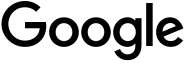

In [102]:
html.text

In [103]:
html.encoding

'UTF-8'

---

## html.encoding 이 UTF-8 로 되있는데도 잘 못가져 온다 
- 뽐 뿌 

In [104]:
url = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

In [105]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

html = downloadGet(url, agent)

In [106]:
html.text

'\x1f�\x08\x00\x00\x00\x00\x00\x00\x03�}�\x7f\x1b蘭偵惰s��姑Ev��~;\x12\x17\x02�p.���qn��>#idM<�\x113#;.額/i\x02=@1r-��_���\x0c5\x0eP\n\'�\x16N�\x10z擡읠i��p>w�=3漏i���Qbp,谿쌍�k�痕k�쏴瓊\x07\x1e{致�\x7f}�q\x12Uc\x02y紵�>丑\x11쬐���z�8��\x1d}�膾��>�\x14q;\\十��\n����\nN豫�0���j|흗\x1c\x1f\x1fw�{\x1d�<�<�#�I鴨팃�G�j*�\x08�a펌y\x18檉\x1f�\r��\x18㎠\x04바�\x17\x12���9"�*\'�吹\x13q�!!���Q���\x13�\x0e�P��\x15N�q��}Tf��\x11��C2\x1f�功\x04;�*遞v<�\t�ド"�(u龕械�G�G�X�U��`.蒲�>.<�1F)��q>�M�QI6�=退�O?退���g\x1d\x15�aN�\x1a�j�_曝�{\x15�￦캡$�\x15\x13\x15Ptv\x1e~�n/#\x1c尸晝$�&�q>�F}an�\x0fqv衒\x10�EhJV�+!V�|�\x19�H\x0c��\x121澄�쪼�;\x0b充Mp�!∑�\x08㏀�\x1c:�D8�\x1b��#���N楚*�e)炚����F��\x18;b6��汀q�n<�\x08I�Q�I\t\x15\'\x0f�\x016\x1e\x0fx\\�>W�㏖\x11\x17G��Z�A\x1b.�&㉣�V@�U�昌\x05b\'��so&?XZY/\x1cvj7���\x05^\x1c%Q���l�n\x11西8F$iD鮮8���1t��#l�\x17&|�H�轍僭/lD�\x04�MA�R�\x1c㏀�\n>力\x19�e�S�h2��)�2\x1a��\r�\x12L-邦m\'-�@5�|`�\x01W옹�\x1e��w詭����P�;�G���\x1f�s���R�j\x0f\x1c猜0\x1f9�9�栓��JaU樸��F悍hP:Y�\x00b쉰~��C\x07\x04��w[�_\x04%V\x0e;�/\x04갼!\x16�Ue�\x01*�\x0b莎

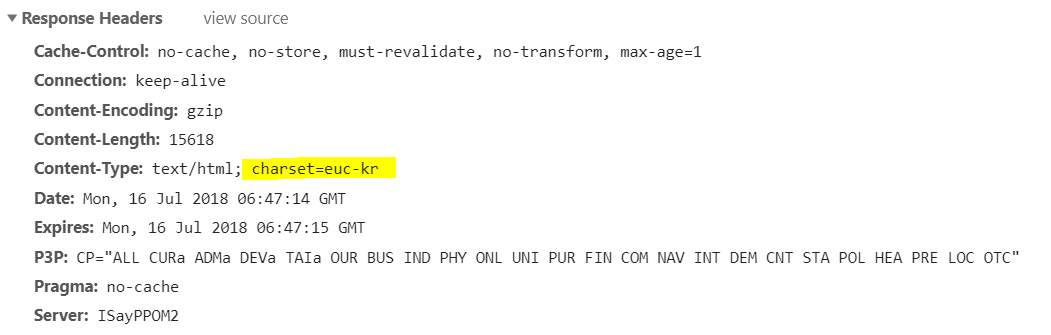
- euc-kr 짤라서 가져오면 byte

In [107]:
type(html.text)

str

In [108]:
html.encoding

'euc-kr'

In [109]:
type(html.content)

bytes

In [110]:
# byte 로 decoding
html.content.decode("utf-8")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [111]:
#euc-kr 도 안됨. 
html.content.decode("euc-kr")

UnicodeDecodeError: 'euc_kr' codec can't decode byte 0x8b in position 1: illegal multibyte sequence

In [127]:
def download(url, agent="python-bot", num_retries=2 ):
    headers = {"User-agent": agent}
    req = Request(url, headers=headers)
    
    try:
        res = urlopen(req)
    except HTTPError as e:
        res = None
        print(e.code, e.reason, e.headers)

        if 500<=e.error<600 and num_retries>0:
            # 반복횟수에 맞게 재귀적으로 호출 
            return download(url, num_retries=num_retries-1)
    

    return res

In [128]:
# 앞에서 햇던 urllib으로 가져옴

agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
url = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

html = download(url, agent=agent)

In [129]:
html = html.read()

In [130]:
type(html)

bytes

In [131]:
html.decode("utf-8")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 466: invalid start byte

In [132]:
html1 = html.decode("euc-kr")

In [134]:
html2 = html1.encode("utf-8").decode("utf-8")

In [135]:
type(html1), type(html2)

(str, str)

In [136]:
text1 = bs(html, "lxml")

In [137]:
text1.contents

['html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"',
 <html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="text/javascript" http-equiv="Content-Script-Type"/>
 <meta content="text/css" http-equiv="Content-Style-Type"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="PPOMPPU CO." name="author"/>
 <meta content="뽐뿌" name="description"/>
 <meta content="" name="keywords"/>
 <!--
 <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />
 -->
 <meta content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" property="og:image"/>
 <meta content="뽐뿌" property="og:site_name"/>
 <title>뽐뿌 - 자유게시판</title><!--<link href='http://fonts.googleapis.com/css?family=Noto+Sans' rel='stylesheet' type='text/css'>-->
 <link href="//www.ppomppu.co.kr/css/style.css?v=2018070218" rel="styles

In [138]:
text1.a

<a class="tab" rel="#tab1-contents">단축키</a>

In [139]:
aList = text1.find_all("a")

In [140]:
for row in aList:
    print(row.attrs)

{'rel': ['#tab1-contents'], 'class': ['tab']}
{'rel': ['#tab2-contents'], 'class': ['tab']}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=event'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=buy'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=help'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=etc_info'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=free_picture'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=news2'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=review'}
{'href': 'http://www.ppomppu.co.kr/recent_main_article.php?type=market'}
{'href': 'http://www.ppomppu.co.kr/myinfo/env.php?cmd=env', 'target': '_blank'}
{'href': 'http://www.ppomppu.co.kr/myinfo/member_bookmark.php', 'target': '_blank'}
{'href': 'http://www.ppomppu.co.kr/index.php', 'class': ['logo-sm']}
{'href': '/z